<a href="https://colab.research.google.com/github/MafeGomez-11/Metodos1_MariaFernandaGomez_MarianaMoya/blob/main/Tarea_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**2.0.2** Máximos

1. Descargue los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt  
Diseñe un algoritmo para encontrar todos los máximos locales en esta serie de datos. La figura [2.1] muestra la serie de datos y los máximos locales.

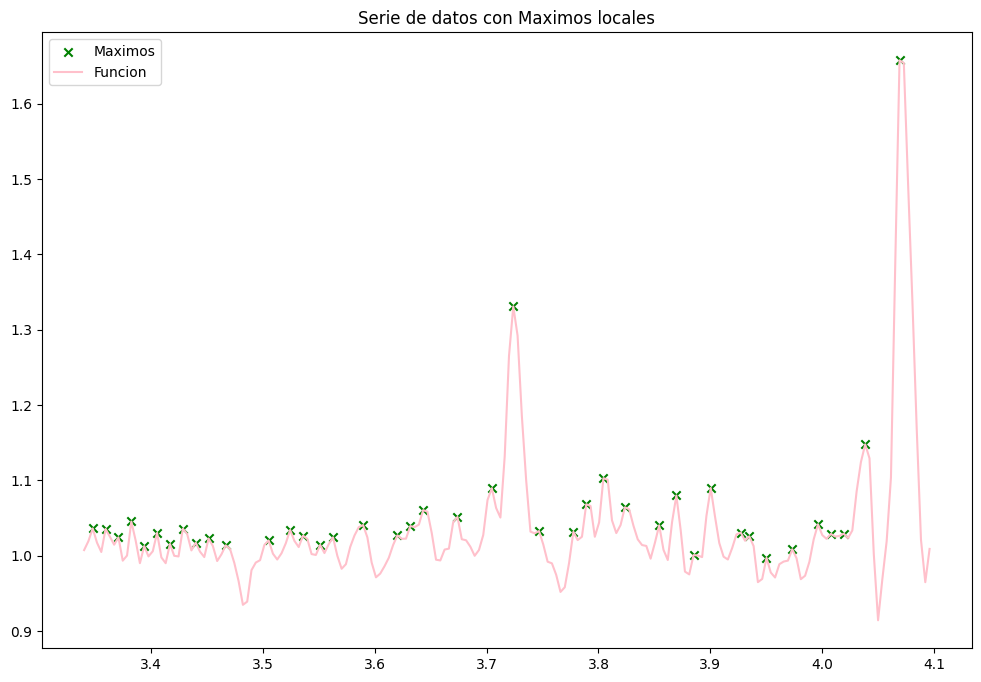

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/EstrellaEspectro.txt'
data = np.loadtxt(url)
def maximos(data):
  maximos_locales_x = []
  maximos_locales_y = []
  for i in range (1, len(data)-1):
    if data[i,1] > data[i-1,1] and data[i,1] > data[i+1,1]:
        maximos_locales_x.append(data[i,0])
        maximos_locales_y.append(data[i,1])
  return maximos_locales_x, maximos_locales_y

x,y = maximos(data)
plt.figure(figsize=(12, 8))
plt.scatter(x, y, color='green', marker='x', label='Maximos')
plt.plot(data[:,0], data[:,1], color='pink', label='Funcion')
plt.title('Serie de datos con Maximos locales')
plt.legend()
plt.show()





###**2.0.5** Espiral de arquímedes

(a) La espiral de arquímedes está descrita por la siguiente ecuación en coordenadas polares:             *r = a + bθ*

  Haga *a = 0* y *b = 1* y calcule las posiciones *r* entre *θ ∈ [0., 2π]*

(b) Haga el cambio de coordenadas y grafique la espiral

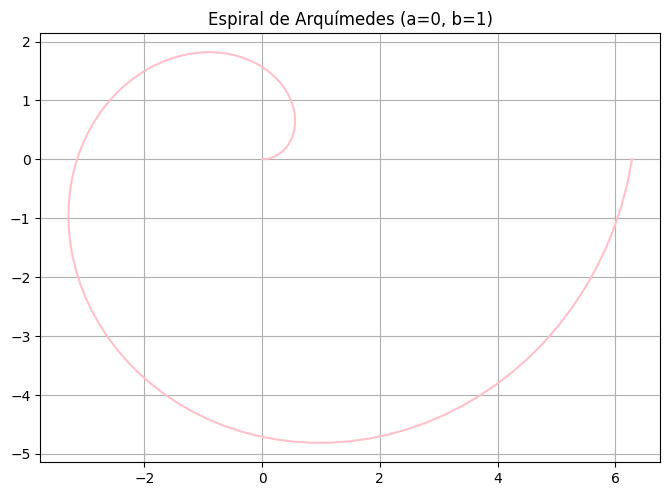

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a=0
b=1
#Parte a, calculo de R con respecto a Theta

theta = np.linspace(0, 2*np.pi, 100)
r = a+(b*theta)

#Parte b, cambio de coordenadas polares a cartesianas

x=r*np.cos(theta)
y=r*np.sin(theta)

plt.figure(figsize=(8, 8))
plt.plot(x, y,  color="pink")
plt.gca().set_aspect('equal')
plt.title('Espiral de Arquímedes (a=0, b=1)')
plt.grid(True)
plt.show()






###Ejercicios: Derivación

###**2.**   Usando la definición de derivada central (con h= 0.05) estime la derivada de la función: $\frac{1}{\sqrt{1+{e}^{{-x}^{2}}}}$
### En el intervalo (−10≤x≤10.b)  Para el intervalo anterior, estimar el error en cada punto nodal.


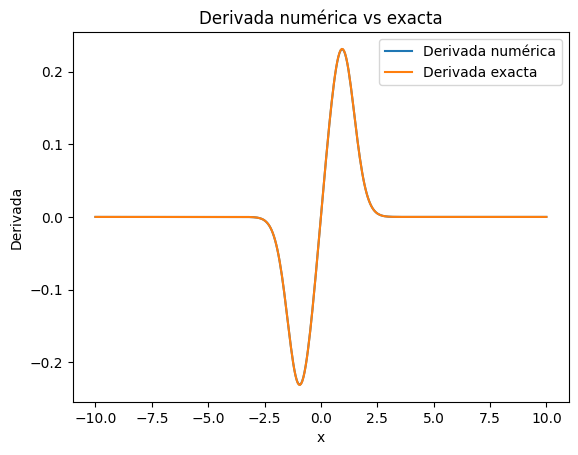

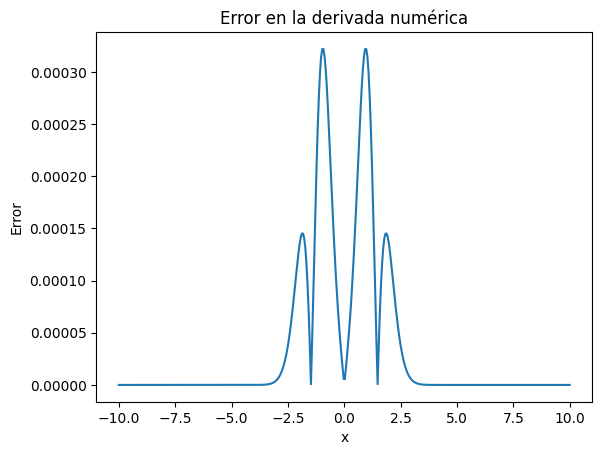

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def funcion(x):
    return 1 / np.sqrt(1 + np.exp(-x**2))

def derivada_analitica(x):
    return x * np.exp(-x**2) / (1 + np.exp(-x**2))**(3/2)

def derivada_central(f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

x_values = np.linspace(-10, 10, 400)
h = 0.05

derivadas_numericas = np.zeros_like(x_values)
derivadas_exactas = np.zeros_like(x_values)
errores = np.zeros_like(x_values)

for i, x in enumerate(x_values):
    derivadas_numericas[i] = derivada_central(funcion, x, h)
    derivadas_exactas[i] = derivada_analitica(x)
    errores[i] = np.abs((derivadas_numericas[i] - derivadas_exactas[i]))

plt.plot(x_values, derivadas_numericas, label='Derivada numérica')
plt.plot(x_values, derivadas_exactas, label='Derivada exacta')
plt.xlabel('x')
plt.ylabel('Derivada')
plt.title('Derivada numérica vs exacta')
plt.legend()
plt.show()

plt.plot(x_values, errores)
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Error en la derivada numérica')
plt.show()

###**6.**   Calcular el campo de velocidades cerca de la superficie de un cilindro de radioR= 2cm. Para esta tarea realizar los siguientes pasos:

### a)  Definir  una  discretización en  los  ejes x e y,  donde la  región  es: A ∈ [−4,4]  con 25 puntos en cada eje.
###b)  Definir la funci ́on potencial del flujo dada por:

$\phi(x,y)=V*x(1-\frac{{R}^{2}}{{x}^{2}+{y}^{2}})$
### donde V= 2cm/s.
### c)  Calcule  y  guarde  adecuadamente  el  campo  de  velocidades  usando  la  definición  dederivada parcial central como:
$vx=\frac{\partial\phi}{\partial*x}$

$vy=-\frac{\partial\phi}{\partial*y}$
### useh= 0.001.  Note que al interior del cilindro el campo de velocidades debe ser iguala cero.
###d)  Dibuje el campo de velocidades usando el método:ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j]).Debería obtener algo com


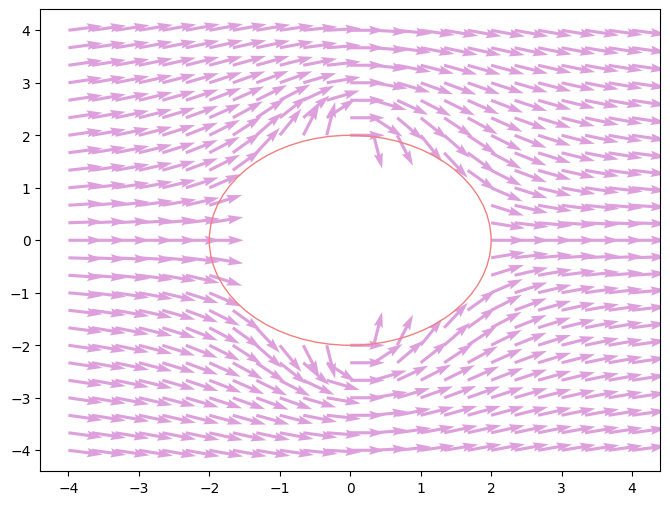

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(-4,4,25)
y=np.linspace(-4,4,25)
def funcion(x,y):
    R=2
    v=2
    phi=v*x*(1-((R**2)/((x**2)+(y**2))))
    return phi

x2, y2 = np.meshgrid(x, y)

def Vx(f,x,y,h):

  d = 0.

  if h != 0:
    d = (f(x+h,y) - f(x-h,y))/(2*h)

  return d

def Vy(f,x,y,h):

  d = 0.

  if h != 0:
    d = (f(x,y+h) - f(x,y-h))/(2*h)

  return -d

h=0.001
fig=plt.figure(4,figsize=(8,6))

ax3=fig.add_subplot(111)
for i in range(len(x)):
    for j in range(len(x)):
        magnitud=np.sqrt(x[i]**2+y[j]**2)
        if magnitud>=2:
            Vx_normalizado = Vx(funcion,x[i],y[j],h)/magnitud
            Vy_normalizado = Vy(funcion,x[i],y[j],h)/magnitud
            ax3.quiver(x[i], y[j], Vx_normalizado, Vy_normalizado, color="plum", width=0.005)
circle=plt.Circle((0,0),2,color='lightcoral',fill=False)
ax3.add_artist(circle)
plt.show()
